In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
train_data = pd.read_csv("http://www.amlbook.com/data/zip/features.train", header=None, delim_whitespace = True)
train_x = np.array(train_data.iloc[:,1:])
train_y = np.array(train_data.iloc[:,0])
test_data = pd.read_csv("http://www.amlbook.com/data/zip/features.test", header=None, delim_whitespace = True)
test_x = np.array(test_data.iloc[:,1:])
test_y = np.array(test_data.iloc[:,0])

# Problem 15

In [3]:
from sklearn.svm import SVC

In [4]:
log_C = [ -6, -4, -2, 0, 2]
C = [10**i for i in log_C]
clfs15 = []
for c in C:
    clf = SVC(kernel="linear", C=c)
    clf.fit(train_x, train_y == 0)
    clfs15.append(clf)

In [5]:
w_length_15 = [np.linalg.norm(clf.coef_[0]) for clf in clfs15]
w_length_15

[6.0206550090759889e-05,
 0.0060189611378155235,
 0.57131714942568668,
 11.328063062535298,
 13.092344116324556]

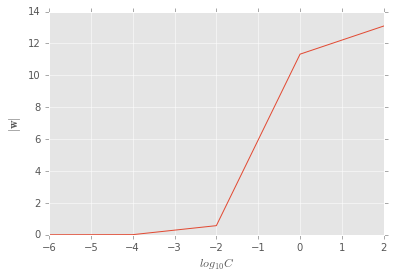

In [6]:
plt.plot(log_C, w_length_15)
plt.xlabel(r"$log_{10}C$")
plt.ylabel(r"$|\bf{w}|$")
plt.savefig("15")

# Problem 16

In [7]:
clfs16 = []
for c in C:
    clf = SVC(kernel="poly", C=c, coef0= 1, degree= 2, gamma= 1)
    clf.fit(train_x, train_y == 8)
    clfs16.append(clf)

In [8]:
from sklearn.metrics import zero_one_loss

In [9]:
E_in_16 = [zero_one_loss(clf.predict(train_x), train_y == 8) for clf in clfs16]
E_in_16

[0.074338225209162001,
 0.074338225209162001,
 0.074338225209162001,
 0.074338225209162001,
 0.074338225209162001]

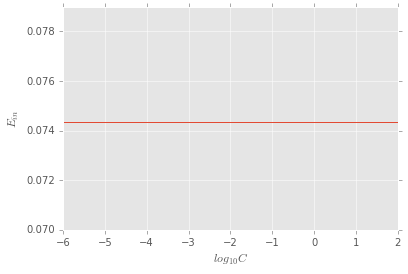

In [10]:
plt.plot(log_C, E_in_16)
plt.xlabel(r"$log_{10}C$")
plt.ylabel(r"$E_{in}$")
plt.savefig("16")

# Problem 17

In [11]:
sum_alpha = [np.sum(np.abs(clf.dual_coef_)) for clf in clfs16]
sum_alpha

[0.0010839999999999999, 0.10840000000000002, 10.84, 1084.0, 108400.0]

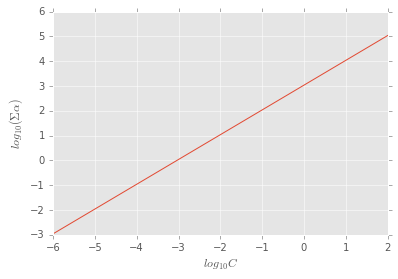

In [12]:
plt.plot(log_C, np.log10(sum_alpha))
plt.xlabel(r"$log_{10}C$")
plt.ylabel(r"$log_{10}(\Sigma \alpha)$")
plt.savefig("17")

# Problem 18

In [13]:
log_C18 = [-3, -2, -1, 0, 1]
C18 = [10**i for i in log_C18]
clfs18 = []
for c in C18:
    clf = SVC(kernel="rbf", C=c, gamma= 100)
    clf.fit(train_x, train_y == 0)
    clfs18.append(clf)

In [14]:
from sklearn.metrics.pairwise import rbf_kernel

In [15]:
K = rbf_kernel(train_x, train_x, gamma= 100)

In [16]:
# https://class.coursera.org/ntumltwo-002/forum/thread?thread_id=19
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel
distance = []
for clf in clfs18:
    a = np.zeros(K.shape[0])
    a[clf.support_] = clf._dual_coef_
    d2 = np.dot(a,np.dot(a,K))
    distance.append(1/np.sqrt(d2))
distance

[8.2367961076879919,
 0.82480845410782921,
 0.12884523746070747,
 0.084160502920403446,
 0.041092303132088691]

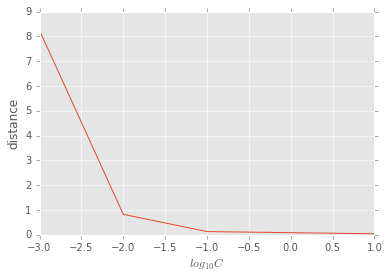

In [17]:
plt.plot(log_C18, distance)
plt.xlabel(r"$log_{10}C$")
plt.ylabel("distance")
plt.savefig("18")

# Problem 19

In [18]:
log_gamma = [0,1,2,3,4]
gamma = [10**i for i in log_gamma]
clfs19 = []
for g in gamma:
    clf = SVC(kernel="rbf", C=0.1, gamma= g)
    clf.fit(train_x, train_y == 0)
    clfs19.append(clf)

In [19]:
E_out_19 = [zero_one_loss(clf.predict(test_x), test_y == 0) for clf in clfs19]
E_out_19

[0.10712506228201291,
 0.09915296462381662,
 0.10513203786746383,
 0.17887394120577982,
 0.17887394120577982]

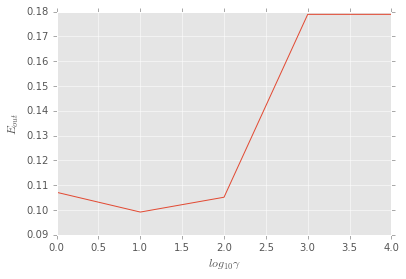

In [20]:
plt.plot(log_gamma, E_out_19)
plt.xlabel(r"$log_{10} \gamma$")
plt.ylabel(r"$E_{out}$")
plt.savefig("19")

# Problem 20

In [21]:
from sklearn import cross_validation

In [22]:
log_gamma_min = []
for train_index, valid_index in cross_validation.ShuffleSplit(len(train_y), n_iter=100, test_size=1000):
    clfs20 = []
    for g in gamma:
        clf = SVC(kernel="rbf", C=0.1, gamma= g)
        clf.fit(train_x[train_index], train_y[train_index] == 0)
        clfs20.append(clf)
    E_val_20 = [zero_one_loss(clf.predict(train_x[valid_index]), train_y[valid_index] == 0) for clf in clfs20]
    i = np.argmin(E_val_20)
    log_gamma_min.append(log_gamma[i])

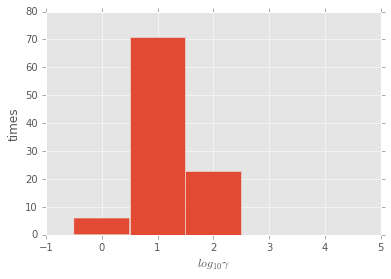

In [23]:
plt.hist(log_gamma_min, bins=5, range=(-0.5,4.5))
plt.xlabel(r"$log_{10} \gamma$")
plt.ylabel("times")
plt.savefig("20")